In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib as plt

In [3]:
df = pd.read_csv('C://Users//Dell//Downloads//train.csv')

In [4]:
#EDA 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
np.sum(df.isna())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.drop('Name',inplace=True,axis=1)

In [7]:
df.drop('PassengerId',inplace=True,axis=1)

In [8]:
df.drop('Ticket',axis=1,inplace=True)

In [9]:
df.drop('Cabin',inplace=True,axis=1)

In [ ]:
# to create dummy variable:
#df['Sex'] = df['Sex'].map({'female':0,'male':1})

In [10]:
sex_d=pd.get_dummies(df['Sex'],drop_first=True)
sex_d

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [11]:
em_d = pd.get_dummies(df['Embarked'],drop_first=True)
em_d

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [12]:
df=pd.concat(objs=(df,sex_d,em_d),axis=1)

In [13]:
df.drop('Sex',axis=1,inplace=True)

In [14]:
df.drop('Embarked',axis=1,inplace=True)

In [15]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,NaN,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


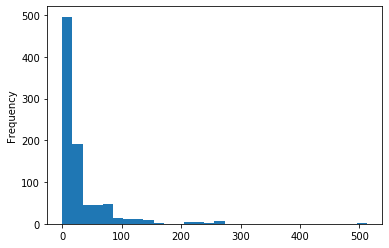

In [16]:
df['Fare'].plot(kind='hist',bins=30)

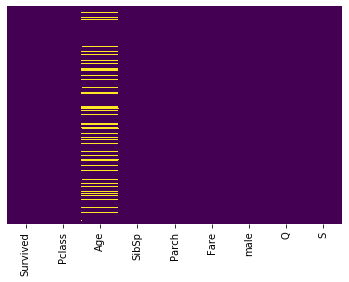

In [17]:
sn.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

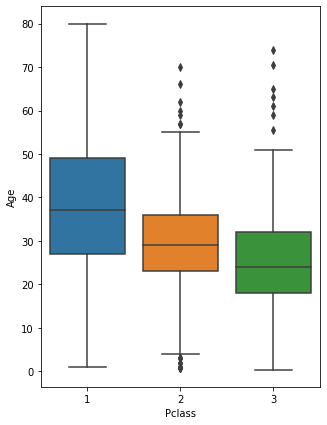

In [18]:
plt.pyplot.figure(figsize = (5,7))
sn.boxplot(x=df['Pclass'],y=df['Age'],data=df)

In [19]:
df.fillna(value=df.mean(),inplace=True)
np.sum(df['Age'].isna())

0

In [21]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


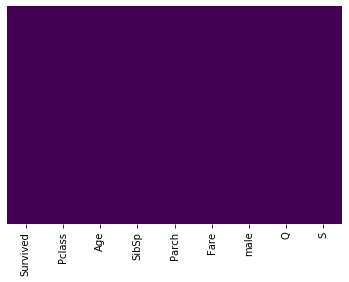

In [22]:
sn.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [23]:
#Model Building 
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

In [24]:
X = df[['Pclass','Age','SibSp','Parch','Fare','male','Q','S']]
y = df['Survived']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
log_model = lm.fit(X_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
pre = log_model.predict(X_test)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       154
           1       0.79      0.65      0.71       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268



In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
print(confusion_matrix(y_test,pre))

[[134  20]
 [ 40  74]]


In [32]:
eval = (134+74)/(134+74+20+40)
eval*100

77.61194029850746